Shown below is the data analysis of datasets hCCR2_LIGANDS and hCCR158_LIGANDS (the antitarget), as retrieved from papyrus.


### First the hCCR2 dataset looking at pchembl

the mean of the data is:  6.871632091690544
and the median of the data is:  6.94


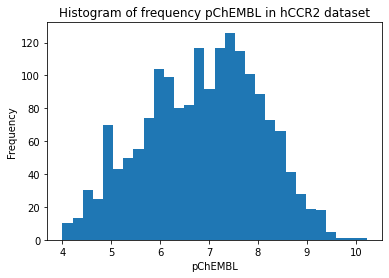

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import split_data as split

pfile = "/zfsdata/data/yorick/Internship/Files/Datasets/basedatasets/hCCR2_LIGANDS_achiral_2000-2021_accession.tsv"
# import relevant files
LigTot = pd.read_csv(pfile, sep='\t')
# LigAct = pd.read_csv("/zfsdata/data/yorick/Internship/Files/hCCR2_LIGANDS_active.tsv", sep='\t')
# LigInAct = pd.read_csv("/zfsdata/data/yorick/Internship/Files/hCCR2_LIGANDS_inactive.tsv", sep='\t')

# retrieve data from dataframe and cast to float
data = LigTot["pchembl_value_Mean"].astype(float)
mean = data.mean()
median = data.median()

print("the mean of the data is: ", mean)
print("and the median of the data is: ", median)

# plot histogram
graph = data.plot.hist(title="Histogram of frequency pChEMBL in hCCR2 dataset", bins = 30,)
graph.set(xlabel= "pChEMBL", ylabel="Frequency" );





In [8]:
# When using the median to split up the dataset
up, down = split.datasplitter(LigTot, "pchembl_value_Mean", median)
print(f"with median {median}, size of subset 'up' is: ", up.shape)
print(f"with median {median}, size of subset 'down' is: ", down.shape)

# When using the mean to split up the dataset
up2, down2 = split.datasplitter(LigTot, "pchembl_value_Mean", mean)
print(f"with mean {mean}, size of subset 'up' is: ", up2.shape)
print(f"with mean {mean}, size of subset 'down' is: ", down2.shape)

# When using 6.5 to split up the dataset
up3, down3 = split.datasplitter(LigTot, "pchembl_value_Mean", 6.5)
print(f"with threshold {6.5}, size of subset 'up' is: ", up3.shape)
print(f"with threshold {6.5}, size of subset 'down' is: ", down3.shape)
# up2.plot.hist(by="pchembl_value_Mean", title = "Upper Subset", bins = 20) YOU NEED TO RECAST PCHEMBL DATA INTO FLOAT


with median 6.94, size of subset 'up' is:  (875, 34)
with median 6.94, size of subset 'down' is:  (870, 34)
with mean 6.871632091690544, size of subset 'up' is:  (912, 34)
with mean 6.871632091690544, size of subset 'down' is:  (833, 34)
with threshold 6.5, size of subset 'up' is:  (1089, 34)
with threshold 6.5, size of subset 'down' is:  (656, 34)


### Now the Anti hCCR158 Dataset looking at pchembl

the mean of the data is:  7.100226580226905
and the median of the data is:  7.24


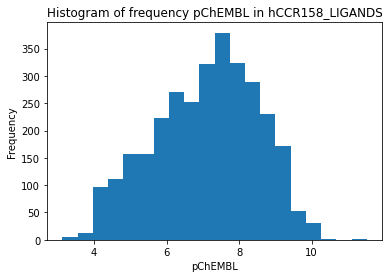

In [18]:
# import relevant files

anti_pfile = "/zfsdata/data/yorick/Internship/Files/Datasets/basedatasets/hCCR158_LIGANDS.tsv"
LigAnti = pd.read_csv(anti_pfile, sep='\t')


# retrieve data from dataframe and cast to float
data_anti = LigAnti["pchembl_value_Mean"].astype(float)
mean_anti = data_anti.mean()
median_anti = data_anti.median()

print("the mean of the data is: ", mean_anti)
print("and the median of the data is: ", median_anti)

# plot histogram
graph2 = data_anti.plot.hist(title="Histogram of frequency pChEMBL in hCCR158_LIGANDS", bins = 20)
graph2.set(xlabel= "pChEMBL", ylabel="Frequency" );

In [19]:
# When using the median to split up the dataset
up_anti, down_anti = split.datasplitter(LigAnti, "pchembl_value_Mean", median_anti)
print(f"with median {median_anti}, size of subset 'up' is: ", up_anti.shape)
print(f"with median {median_anti}, size of subset 'down' is: ", down_anti.shape)

# When using the mean to split up the dataset
up_anti2, down_anti2 = split.datasplitter(LigAnti, "pchembl_value_Mean", mean_anti)
print(f"with mean {mean_anti}, size of subset 'up' is: ", up_anti2.shape)
print(f"with mean {mean_anti}, size of subset 'down' is: ", down_anti2.shape)

# When using 6.5 to split up the dataset
up_anti2, down_anti2 = split.datasplitter(LigAnti, "pchembl_value_Mean", 6.5)
print(f"with threshold {6.5}, size of subset 'up' is: ", up_anti2.shape)
print(f"with threshold {6.5}, size of subset 'down' is: ", down_anti2.shape)


with median 7.24, size of subset 'up' is:  (1545, 31)
with median 7.24, size of subset 'down' is:  (1540, 31)
with mean 7.100226580226905, size of subset 'up' is:  (1650, 31)
with mean 7.100226580226905, size of subset 'down' is:  (1435, 31)
with threshold 6.5, size of subset 'up' is:  (2041, 31)
with threshold 6.5, size of subset 'down' is:  (1044, 31)


### Now look at the distribution of years in which compounds were published in the hCCR2 dataset 

all items in CCR2_year is: 1741
<class 'pandas.core.series.Series'>
Sum of all frequencies in dct is: 1741


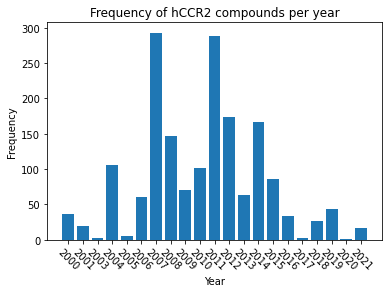

In [10]:
# retrieve data from dataframe and cast to float
import numpy as np 


CCR2_year = LigTot["Year"].astype(float)
CCR2_year.dropna(inplace=True)
print(f"all items in CCR2_year is: {len(CCR2_year)}")


dct = {}
print(type(CCR2_year))
# print(CCR2_year)

# make dictionary couting years and frequencies.
for el in CCR2_year:
    if el not in dct.keys():
        dct[el] = 1
    elif el in dct.keys():
        dct[el] += 1

print(f'Sum of all frequencies in dct is: {sum(dct.values())}')

# sort ditionary:
sorted_dct = sorted(dct)
final_dct = {key:dct[key] for key in sorted_dct}


# Plot frequencies as bar graph
keys = [str(int(list(final_dct.keys())[e])) for e in range(len(final_dct.keys()))]
barplot = plt.bar(keys, final_dct.values())
plt.xticks(rotation=-45)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency of hCCR2 compounds per year");
# index.sort()
# print(index)



In [11]:
# cumlative frequencies over the years of CCR2
cuml_year = []
for el, val in enumerate(final_dct.values()):
    if el == 0:
        cuml_year.append(val)
        # print(cuml_year)
    else:
        new_entry = val + cuml_year[el-1]
        cuml_year.append(new_entry)
        # print(cuml_year, " + ", val)
print(cuml_year)



[36, 55, 58, 164, 169, 229, 522, 669, 740, 841, 1130, 1304, 1367, 1534, 1620, 1653, 1655, 1681, 1724, 1725, 1741]


Cumulative graph of histogram of hCCR2 compounds per year

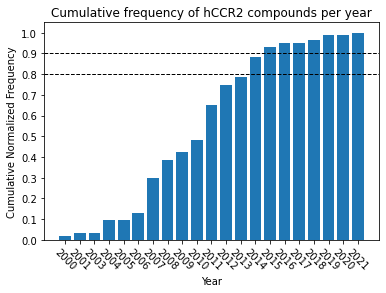

In [44]:
# Plot frequencies as bar graph

from matplotlib.ticker import FormatStrFormatter

# Normalize frequencies
maxn = max(cuml_year)
norm_years = [float(cuml_year[ele] / maxn) for ele in range(len(cuml_year))]
# print(norm_years)

# get list of keys as strings
keys = [str(int(list(final_dct.keys())[e])) for e in range(len(final_dct.keys()))]
# print(keys)


plt.bar(keys, norm_years) # normalized bar graph
# plt.bar(keys, cuml_year) # cumulative years

plt.axhline([0.8], color = 'k', linestyle = 'dashed', linewidth=1)
plt.axhline([0.9], color = 'k', linestyle = 'dashed', linewidth=1)
# plt.plot(('2000', '2013'), (0.8, 0.8), color = 'k', linestyle = 'dashed', linewidth=1)
# plt.hlines(y=0.8, xmin = '2000', xmax = '2013')
plt.xlabel("Year")
plt.xticks(rotation = -45)
plt.yticks([n for n in np.linspace(0,1,11)])
plt.ylabel("Cumulative Normalized Frequency")
plt.title("Cumulative frequency of hCCR2 compounds per year");

### Now we look at the histogram and cumulative histogram of hCCR158_LIGANDS per year

all items in hCCR158_year is: 3117
Sum of all frequencies in dct is: 3117


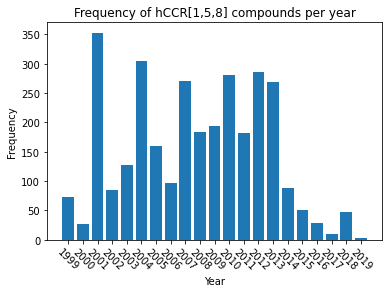

In [65]:

hCCR158_year = LigAnti["Year"].astype(float)
hCCR158_year.dropna(inplace=True)
print(f"all items in hCCR158_year is: {len(hCCR158_year)}")


a_dct = {}
# print(type(hCCR158_year))
# # print(CCR2_year)

# make dictionary couting years and frequencies.
for el in hCCR158_year:
    if el not in a_dct.keys():
        a_dct[el] = 1
    elif el in a_dct.keys():
        a_dct[el] += 1

print(f'Sum of all frequencies in dct is: {sum(a_dct.values())}')

# sort ditionary:
sorted_a_dct = sorted(a_dct)
final_a_dct = {key:a_dct[key] for key in sorted_a_dct}


# Plot frequencies as bar graph
a_keys = [str(int(list(final_a_dct.keys())[e])) for e in range(len(final_a_dct.keys()))]
barplot = plt.bar(a_keys, final_a_dct.values())
plt.xticks(rotation=-45)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency of hCCR[1,5,8] compounds per year");
# index.sort()
# print(index)


all years:  [36, 55, 58, 164, 169, 229, 522, 669, 740, 841, 1130, 1304, 1367, 1534, 1620, 1653, 1655, 1681, 1724, 1725, 1741]
normalized frequency per years:  [0.023419955085017645, 0.03176130895091434, 0.1450112287455887, 0.17228103946102022, 0.21302534488290023, 0.31055502085338466, 0.3618864292589028, 0.39268527430221367, 0.47962784728906, 0.5386589669554058, 0.6008982996470965, 0.6910490856592878, 0.7494385627205646, 0.8411934552454283, 0.9274943856272057, 0.9557266602502407, 0.971767725376965, 0.9810715431504652, 0.9839589348732756, 0.9990375360923965, 1.0]
['2000', '2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


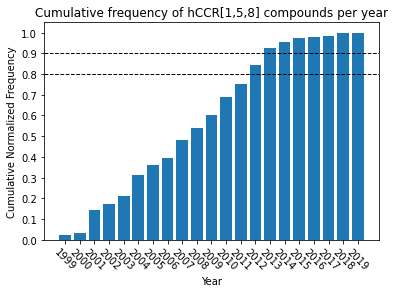

In [45]:
# Plot frequencies as bar graph

from matplotlib.ticker import FormatStrFormatter

# cumlative frequencies over the years of CCR2
cuml_a_year = []
for el, val in enumerate(final_a_dct.values()):
    if el == 0:
        cuml_a_year.append(val)
        # print(cuml_year)
    else:
        new_entry = val + cuml_a_year[el-1]
        cuml_a_year.append(new_entry)
        # print(cuml_year, " + ", val)
print("all years: ", cuml_year)


# Normalize frequencies
maxn = max(cuml_a_year)
norm_a_years = [float(cuml_a_year[ele] / maxn) for ele in range(len(cuml_a_year))]
print("normalized frequency per years: ", norm_a_years)

# get list of keys as strings
a_keys = [str(int(list(final_a_dct.keys())[e])) for e in range(len(final_a_dct.keys()))]
print(keys)


plt.bar(a_keys, norm_a_years) # normalized bar graph
# plt.bar(keys, cuml_year) # cumulative years

plt.axhline([0.8], color = 'k', linestyle = 'dashed', linewidth=1)
plt.axhline([0.9], color = 'k', linestyle = 'dashed', linewidth=1)
# plt.plot(('2000', '2013'), (0.8, 0.8), color = 'k', linestyle = 'dashed', linewidth=1)
# plt.hlines(y=0.8, xmin = '2000', xmax = '2013')
plt.xlabel("Year")
plt.xticks(rotation = -45)
plt.yticks([n for n in np.linspace(0,1,11)])
plt.ylabel("Cumulative Normalized Frequency")
plt.title("Cumulative frequency of hCCR[1,5,8] compounds per year");

### Look at splitting data for between 2014 and 2015

In [2]:
yr_up, yr_down = split.datasplitter(LigTot, "Year", 2014)
print(f"Number of items in year up: {len(yr_up)}")
print(f"Number of items in year down: {len(yr_down)}")
print(f"Ratio: {len(yr_up)/len(yr_up)} op {len(yr_down)/len(yr_up)}")

Number of items in year up: 374
Number of items in year down: 1367
Ratio: 1.0 op 3.6550802139037435


In [3]:
yr_up_an, yr_down_an = split.datasplitter(LigAnti, "Year", 2014)
print(f"Number of items in year up: {len(yr_up_an)}")
print(f"Number of items in year down: {len(yr_down_an)}")
print(f"Ratio: {len(yr_up_an)/len(yr_up_an)} op {len(yr_down_an)/len(yr_up_an)}")

NameError: name 'LigAnti' is not defined

In [4]:
# save up and down datasets for QSAR training

# paths to files
hCCR2_up = "/zfsdata/data/yorick/Internship/Files/Datasets/QSAR_sets/hCCR2_2014_2021_valid.tsv"
hCCR2_down = "/zfsdata/data/yorick/Internship/Files/Datasets/QSAR_sets/hCCR2_2000_2013_train.tsv"

hCCR158_up = "/zfsdata/data/yorick/Internship/Files/Datasets/QSAR_sets/hCCR158_2014_2019_valid.tsv"
hCCR158_down = "/zfsdata/data/yorick/Internship/Files/Datasets/QSAR_sets/hCCR158_1999_2013_train.tsv"

# save datasets
yr_up.to_csv(hCCR2_up, sep='\t', index=False)
yr_down.to_csv(hCCR2_down, sep='\t', index=False)

yr_up_an.to_csv(hCCR158_up, sep='\t', index=False)
yr_down_an.to_csv(hCCR158_down, sep='\t', index=False)
